# 机器学习算法（一）: 基于逻辑回归的分类预测

## 1 逻辑回归的介绍和应用

### 1.1 逻辑回归的介绍

逻辑回归（Logistic regression，简称LR）虽然其中带有"回归"两个字，但逻辑回归其实是一个**分类**模型，并且广泛应用于各个领域之中。虽然现在深度学习相对于这些传统方法更为火热，但实则这些传统方法由于其独特的优势依然广泛应用于各个领域中。

而对于逻辑回归而且，最为突出的两点就是其**模型简单**和**模型的可解释性强**。

逻辑回归模型的优劣势:
* 优点：实现简单，易于理解和实现；计算代价不高，速度很快，存储资源低；
* 缺点：容易欠拟合，分类精度可能不高

### 1.1 逻辑回归的应用


逻辑回归模型广泛用于各个领域，包括机器学习，大多数医学领域和社会科学。例如，最初由Boyd 等人开发的创伤和损伤严重度评分（TRISS）被广泛用于预测受伤患者的死亡率，使用逻辑回归 基于观察到的患者特征（年龄，性别，体重指数,各种血液检查的结果等）分析预测发生特定疾病（例如糖尿病，冠心病）的风险。逻辑回归模型也用于预测在给定的过程中，系统或产品的故障的可能性。还用于市场营销应用程序，例如预测客户购买产品或中止订购的倾向等。在经济学中它可以用来预测一个人选择进入劳动力市场的可能性，而商业应用则可以用来预测房主拖欠抵押贷款的可能性。条件随机字段是逻辑回归到顺序数据的扩展，用于自然语言处理。

逻辑回归模型现在同样是很多分类算法的基础组件,比如 分类任务中基于GBDT算法+LR逻辑回归实现的信用卡交易反欺诈，CTR(点击通过率)预估等，其好处在于输出值自然地落在0到1之间，并且有概率意义。模型清晰，有对应的概率学理论基础。它拟合出来的参数就代表了每一个特征(feature)对结果的影响。也是一个理解数据的好工具。但同时由于其本质上是一个线性的分类器，所以不能应对较为复杂的数据情况。很多时候我们也会拿逻辑回归模型去做一些任务尝试的基线（基础水平）。

说了这些逻辑回归的概念和应用，大家应该已经对其有所期待了吧，那么我们现在开始吧！！！

## 2 学习目标
* 了解 逻辑回归 的理论
* 掌握 逻辑回归 的 sklearn 函数调用使用并将其运用到鸢尾花数据集预测

## 3 代码流程

* Part1 Demo实践
* * Step1:库函数导入
* * Step2:模型训练
* * Step3:模型参数查看
* * Step4:数据和模型可视化
* * Step5:模型预测


* Part2 基于鸢尾花（iris）数据集的逻辑回归分类实践
* * Step1:库函数导入
* * Step2:数据读取/载入
* * Step3:数据信息简单查看
* * Step4:可视化描述
* * Step5:利用 逻辑回归模型 在二分类上 进行训练和预测
* * Step5:利用 逻辑回归模型 在三分类(多分类)上 进行训练和预测

## 4 算法实战

### 4.1 Demo实践

**Step1:库函数导入**

In [1]:
##  基础函数库
import numpy as np 

## 导入画图库
import matplotlib.pyplot as plt
import seaborn as sns

## 导入逻辑回归模型函数
from sklearn.linear_model import LogisticRegression

**Step2:模型训练**

In [2]:
##Demo演示LogisticRegression分类

## 构造数据集
x_fearures = np.array([[-1, -2], [-2, -1], [-3, -2], [1, 3], [2, 1], [3, 2]])
y_label = np.array([0, 0, 0, 1, 1, 1])

## 调用逻辑回归模型
lr_clf = LogisticRegression()

## 用逻辑回归模型拟合构造的数据集
lr_clf = lr_clf.fit(x_fearures, y_label) #其拟合方程为 z=w0+w1*x1+w2*x2  y = sigmod(z)

**Step3:模型参数查看**

In [3]:
## 查看其对应模型的w
print('the weight of Logistic Regression:',lr_clf.coef_)

## 查看其对应模型的w0
print('the intercept(w0) of Logistic Regression:',lr_clf.intercept_)

the weight of Logistic Regression: [[0.73455784 0.69539712]]
the intercept(w0) of Logistic Regression: [-0.13139986]


**Step4:数据和模型可视化**

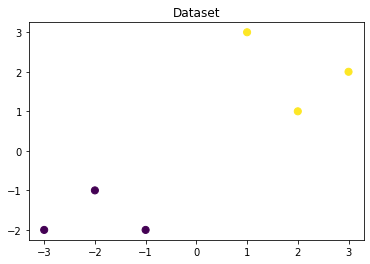

In [4]:
## 可视化构造的数据样本点
plt.figure()
plt.scatter(x_fearures[:,0],x_fearures[:,1], c=y_label, s=50, cmap='viridis')
plt.title('Dataset')
# 参数s：点的大小，c：label 信息，cmap颜色序列
plt.show()

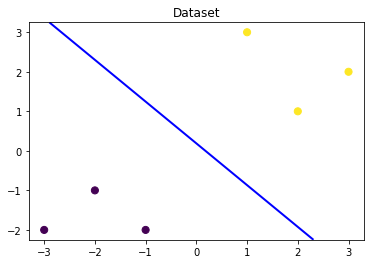

In [5]:
# 可视化决策边界
plt.figure()
plt.scatter(x_fearures[:,0],x_fearures[:,1], c=y_label, s=50, cmap='viridis')
plt.title('Dataset')

nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
x_grid, y_grid = np.meshgrid(np.linspace(x_min, x_max, nx),np.linspace(y_min, y_max, ny))
#以x_min为下界,x_max为上界，平均分成nx个数
# x_grid,y_grid = np.meshgrid(np.linspace(x_min,x_max,nx),np.linspace(y_min,y_max,ny))
# 返回的x_grid表示y_grid个长度为x_grid的向量，每个向量为x_grid
# 返回的y_grid表示y_grid个长度为x_grid的向量，每个向量均为重复的y_grid[i]
# 这样可以将整个图片网格化
z_proba = lr_clf.predict_proba(np.c_[x_grid.ravel(), y_grid.ravel()])
z_proba = z_proba[:, 1].reshape(x_grid.shape)
plt.contour(x_grid, y_grid, z_proba, [0.5], linewidths=2., colors='blue')
#np.ravel将数组连续化，比如np.ravel([[1,2,3],[1,2,3],[1,2,3]])
# 返回array([1, 2, 3, 1, 2, 3, 1, 2, 3])
# 故x_grid.ravel()返回长度为200*100的一维数组，100组，一组为一条横坐标
# y_grid.ravel()为200*100的一维数组，100组，一组为一条纵坐标
# # np.c_按行连接数组，因为在本例中都是一维数组，故相当于组成200*100 个坐标
# # predict_proba(生成属于某一类的概率)(对所有网格进行预测)
plt.show()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  import sys
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  if sys.path[0] == '':


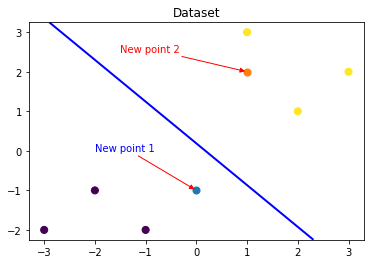

In [6]:
### 可视化预测新样本

plt.figure()
## new point 1
x_fearures_new1 = np.array([[0, -1]])
plt.scatter(x_fearures_new1[:,0],x_fearures_new1[:,1], s=50, cmap='viridis')
plt.annotate(s='New point 1',xy=(0,-1),xytext=(-2,0),color='blue',arrowprops=dict(arrowstyle='-|>',connectionstyle='arc3',color='red'))

## new point 2
x_fearures_new2 = np.array([[1, 2]])
plt.scatter(x_fearures_new2[:,0],x_fearures_new2[:,1], s=50, cmap='viridis')
plt.annotate(s='New point 2',xy=(1,2),xytext=(-1.5,2.5),color='red',arrowprops=dict(arrowstyle='-|>',connectionstyle='arc3',color='red'))

## 训练样本
plt.scatter(x_fearures[:,0],x_fearures[:,1], c=y_label, s=50, cmap='viridis')
plt.title('Dataset')

# 可视化决策边界
plt.contour(x_grid, y_grid, z_proba, [0.5], linewidths=2., colors='blue')

plt.show()
## plt.contour表示等高线，x_grid,y_grid分别表示横纵坐标，z_proba是我们预测出的结果（也是我们画等高线的依据），[0.5] 表示我们以z_proba来画等高线，不带[],直接写int表示画几条线


**Step5:模型预测**

In [7]:
## 在训练集和测试集上分布利用训练好的模型进行预测
y_label_new1_predict = lr_clf.predict(x_fearures_new1)
y_label_new2_predict = lr_clf.predict(x_fearures_new2)

print('The New point 1 predict class:\n',y_label_new1_predict)
print('The New point 2 predict class:\n',y_label_new2_predict)

## 由于逻辑回归模型是概率预测模型（前文介绍的 p = p(y=1|x,\theta)）,所有我们可以利用 predict_proba 函数预测其概率
y_label_new1_predict_proba = lr_clf.predict_proba(x_fearures_new1)
y_label_new2_predict_proba = lr_clf.predict_proba(x_fearures_new2)

print('The New point 1 predict Probability of each class:\n',y_label_new1_predict_proba)
print('The New point 2 predict Probability of each class:\n',y_label_new2_predict_proba)

The New point 1 predict class:
 [0]
The New point 2 predict class:
 [1]
The New point 1 predict Probability of each class:
 [[0.69567724 0.30432276]]
The New point 2 predict Probability of each class:
 [[0.11983936 0.88016064]]


可以发现训练好的回归模型将X_new1预测为了类别0（判别面左下侧），X_new2预测为了类别1（判别面右上侧）。其训练得到的逻辑回归模型的概率为0.5的判别面为上图中蓝色的线。

### 4.2 基于鸢尾花（iris）数据集的逻辑回归分类实践

在实践的最开始，我们首先需要导入一些基础的函数库包括：numpy （Python进行科学计算的基础软件包），pandas（pandas是一种快速，强大，灵活且易于使用的开源数据分析和处理工具），matplotlib和seaborn绘图。

**Step1:库函数导入**

In [8]:
##  基础函数库
import numpy as np 
import pandas as pd

## 绘图函数库
import matplotlib.pyplot as plt
import seaborn as sns

本次我们选择鸢花数据（iris）进行方法的尝试训练，该数据集一共包含5个变量，其中4个特征变量，1个目标分类变量。共有150个样本，目标变量为 花的类别 其都属于鸢尾属下的三个亚属，分别是山鸢尾 (Iris-setosa)，变色鸢尾(Iris-versicolor)和维吉尼亚鸢尾(Iris-virginica)。包含的三种鸢尾花的四个特征，分别是花萼长度(cm)、花萼宽度(cm)、花瓣长度(cm)、花瓣宽度(cm)，这些形态特征在过去被用来识别物种。

|  变量   | 描述  |
|  ----  | ----  |
| sepal length  | 花萼长度(cm) |
| sepal width  | 花萼宽度(cm) |
| petal length | 花瓣长度(cm) |
| petal width  | 花瓣宽度(cm) |
| target  | 鸢尾的三个亚属类别,'setosa'(0), 'versicolor'(1), 'virginica'(2)|

**Step2:数据读取/载入**

In [9]:
## 我们利用 sklearn 中自带的 iris 数据作为数据载入，并利用Pandas转化为DataFrame格式
from sklearn.datasets import load_iris
data = load_iris() #得到数据特征
iris_target = data.target #得到数据对应的标签
iris_features = pd.DataFrame(data=data.data, columns=data.feature_names) #利用Pandas转化为DataFrame格式

**Step3:数据信息简单查看**

In [10]:
## 利用.info()查看数据的整体信息
iris_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


In [11]:
## 进行简单的数据查看，我们可以利用 .head() 头部.tail()尾部
iris_features.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
iris_features.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [13]:
## 其对应的类别标签为，其中0，1，2分别代表'setosa', 'versicolor', 'virginica'三种不同花的类别。
iris_target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [14]:
## 利用value_counts函数查看每个类别数量
pd.Series(iris_target).value_counts()

2    50
1    50
0    50
dtype: int64

In [15]:
## 对于特征进行一些统计描述
iris_features.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


从统计描述中我们可以看到不同数值特征的变化范围。

**Step4:可视化描述**

In [16]:
## 合并标签和特征信息
iris_all = iris_features.copy() ##进行浅拷贝，防止对于原始数据的修改
iris_all['target'] = iris_target

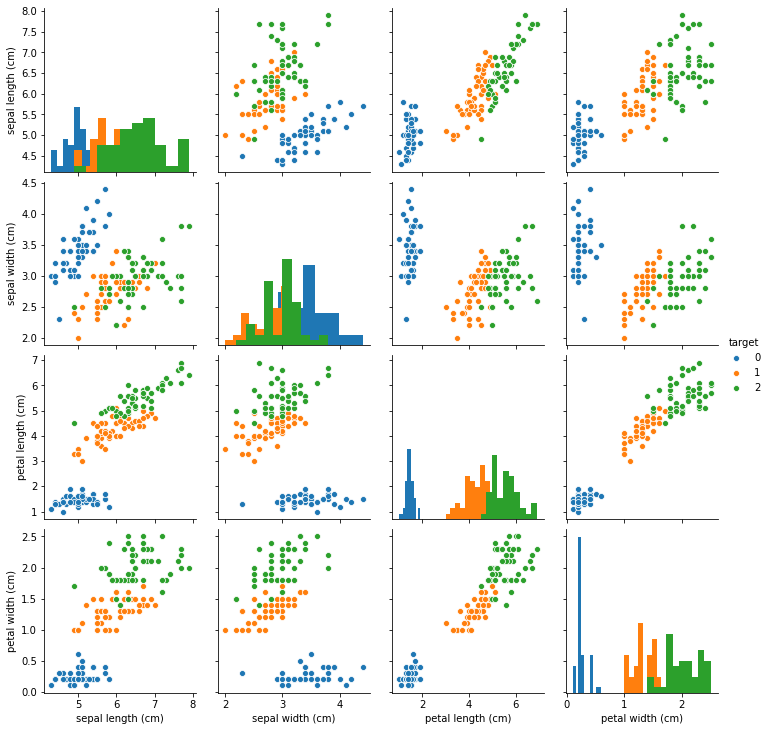

In [17]:
## 特征与标签组合的散点可视化
sns.pairplot(data=iris_all,diag_kind='hist', hue= 'target')
plt.show()

从上图可以发现，在2D情况下不同的特征组合对于不同类别的花的散点分布，以及大概的区分能力。

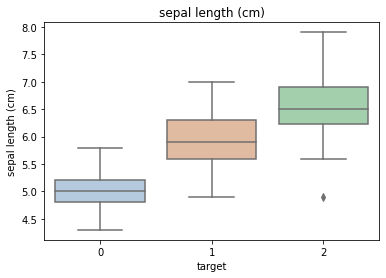

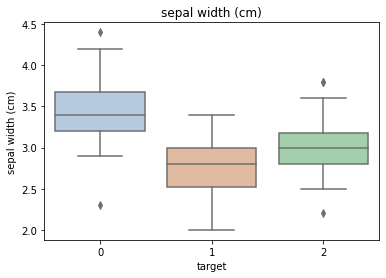

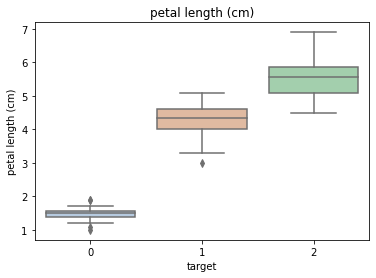

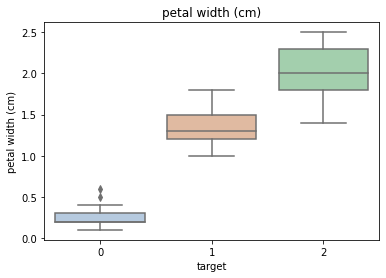

In [18]:
for col in iris_features.columns:
    sns.boxplot(x='target', y=col, saturation=0.5,palette='pastel', data=iris_all)
    plt.title(col)
    plt.show()

利用箱型图我们也可以得到不同类别在不同特征上的分布差异情况。

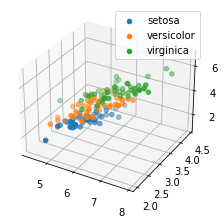

In [20]:
# 选取其前三个特征绘制三维散点图
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
# 第一个参数的控制图片的大小

iris_all_class0 = iris_all[iris_all['target']==0].values
iris_all_class1 = iris_all[iris_all['target']==1].values
iris_all_class2 = iris_all[iris_all['target']==2].values
# 'setosa'(0), 'versicolor'(1), 'virginica'(2)
ax.scatter(iris_all_class0[:,0], iris_all_class0[:,1], iris_all_class0[:,2],label='setosa')
ax.scatter(iris_all_class1[:,0], iris_all_class1[:,1], iris_all_class1[:,2],label='versicolor')
ax.scatter(iris_all_class2[:,0], iris_all_class2[:,1], iris_all_class2[:,2],label='virginica')
plt.legend()

plt.show()

**Step5:利用 逻辑回归模型 在二分类上 进行训练和预测**

In [21]:
## 为了正确评估模型性能，将数据划分为训练集和测试集，并在训练集上训练模型，在测试集上验证模型性能。
from sklearn.model_selection import train_test_split

## 选择其类别为0和1的样本 （不包括类别为2的样本）
iris_features_part = iris_features.iloc[:100]
iris_target_part = iris_target[:100]

## 测试集大小为20%， 80%/20%分
x_train, x_test, y_train, y_test = train_test_split(iris_features_part, iris_target_part, test_size = 0.2, random_state = 2020)

In [22]:
## 从sklearn中导入逻辑回归模型
from sklearn.linear_model import LogisticRegression

In [23]:
## 定义 逻辑回归模型 
clf = LogisticRegression(random_state=0, solver='lbfgs')

In [23]:
# 在训练集上训练逻辑回归模型
clf.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
## 查看其对应的w
print('the weight of Logistic Regression:',clf.coef_)

## 查看其对应的w0
print('the intercept(w0) of Logistic Regression:',clf.intercept_)

the weight of Logistic Regression: [[ 0.45181973 -0.81743611  2.14470304  0.89838607]]
the intercept(w0) of Logistic Regression: [-6.53367714]


In [25]:
## 在训练集和测试集上分布利用训练好的模型进行预测
train_predict = clf.predict(x_train)
test_predict = clf.predict(x_test)

The accuracy of the Logistic Regression is: 1.0
The accuracy of the Logistic Regression is: 1.0
The confusion matrix result:
 [[ 9  0]
 [ 0 11]]


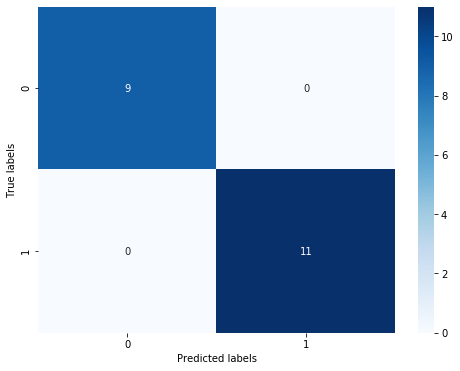

In [26]:
from sklearn import metrics

## 利用accuracy（准确度）【预测正确的样本数目占总预测样本数目的比例】评估模型效果
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_train,train_predict))
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_test,test_predict))

## 查看混淆矩阵 (预测值和真实值的各类情况统计矩阵)
confusion_matrix_result = metrics.confusion_matrix(test_predict,y_test)
print('The confusion matrix result:\n',confusion_matrix_result)

# 利用热力图对于结果进行可视化
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

我们可以发现其准确度为1，代表所有的样本都预测正确了。

**Step6:利用 逻辑回归模型 在三分类(多分类)上 进行训练和预测**

In [27]:
## 测试集大小为20%， 80%/20%分
x_train, x_test, y_train, y_test = train_test_split(iris_features, iris_target, test_size = 0.2, random_state = 2020)

In [28]:
## 定义 逻辑回归模型 
clf = LogisticRegression(random_state=0, solver='lbfgs')

In [29]:
# 在训练集上训练逻辑回归模型
clf.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
## 查看其对应的w
print('the weight of Logistic Regression:\n',clf.coef_)

## 查看其对应的w0
print('the intercept(w0) of Logistic Regression:\n',clf.intercept_)

## 由于这个是3分类，所有我们这里得到了三个逻辑回归模型的参数，其三个逻辑回归组合起来即可实现三分类。

the weight of Logistic Regression:
 [[-0.45928925  0.83069886 -2.26606531 -0.9974398 ]
 [ 0.33117319 -0.72863423 -0.06841147 -0.9871103 ]
 [ 0.12811606 -0.10206463  2.33447679  1.9845501 ]]
the intercept(w0) of Logistic Regression:
 [  9.43880677   3.93047364 -13.36928041]


In [31]:
## 在训练集和测试集上分布利用训练好的模型进行预测
train_predict = clf.predict(x_train)
test_predict = clf.predict(x_test)

## 由于逻辑回归模型是概率预测模型（前文介绍的 p = p(y=1|x,\theta)）,所有我们可以利用 predict_proba 函数预测其概率
train_predict_proba = clf.predict_proba(x_train)
test_predict_proba = clf.predict_proba(x_test)

print('The test predict Probability of each class:\n',test_predict_proba)
## 其中第一列代表预测为0类的概率，第二列代表预测为1类的概率，第三列代表预测为2类的概率。

## 利用accuracy（准确度）【预测正确的样本数目占总预测样本数目的比例】评估模型效果
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_train,train_predict))
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_test,test_predict))

The test predict Probability of each class:
 [[1.03461734e-05 2.33279475e-02 9.76661706e-01]
 [9.69926591e-01 3.00732875e-02 1.21676996e-07]
 [2.09992547e-02 8.69156617e-01 1.09844128e-01]
 [3.61934870e-03 7.91979966e-01 2.04400685e-01]
 [7.90943202e-03 8.00605300e-01 1.91485268e-01]
 [7.30034960e-04 6.60508053e-01 3.38761912e-01]
 [1.68614209e-04 1.86322045e-01 8.13509341e-01]
 [1.06915332e-01 8.90815532e-01 2.26913667e-03]
 [9.46928070e-01 5.30707294e-02 1.20016057e-06]
 [9.62346385e-01 3.76532233e-02 3.91897289e-07]
 [1.19533384e-04 1.38823468e-01 8.61056998e-01]
 [8.78881883e-03 6.97207361e-01 2.94003820e-01]
 [9.73938143e-01 2.60617346e-02 1.22613836e-07]
 [1.78434056e-03 4.79518177e-01 5.18697482e-01]
 [5.56924342e-04 2.46776841e-01 7.52666235e-01]
 [9.83549842e-01 1.64500670e-02 9.13617258e-08]
 [1.65201477e-02 9.54672749e-01 2.88071038e-02]
 [8.99853708e-03 7.82707576e-01 2.08293887e-01]
 [2.98015025e-05 5.45900066e-02 9.45380192e-01]
 [9.35695863e-01 6.43039513e-02 1.85301359e

The confusion matrix result:
 [[10  0  0]
 [ 0  8  2]
 [ 0  2  8]]


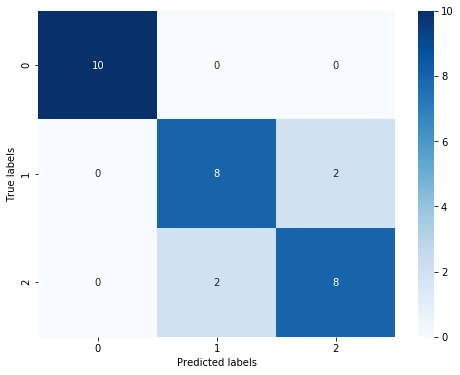

In [32]:
## 查看混淆矩阵
confusion_matrix_result = metrics.confusion_matrix(test_predict,y_test)
print('The confusion matrix result:\n',confusion_matrix_result)

# 利用热力图对于结果进行可视化
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

通过结果我们可以发现，其在三分类的结果的预测准确度上有所下降，其在测试集上的准确度为:$86.67\%$，这是由于'versicolor'（1）和 'virginica'（2）这两个类别的特征，我们从可视化的时候也可以发现，其特征的边界具有一定的模糊性（边界类别混杂，没有明显区分边界），所有在这两类的预测上出现了一定的错误。

## 5 重要知识点

逻辑回归 原理简介：

Logistic回归虽然名字里带“回归”，但是它实际上是一种分类方法，主要用于两分类问题（即输出只有两种，分别代表两个类别），所以利用了Logistic函数（或称为Sigmoid函数），函数形式为：
$$ 
logi(z)=\frac{1}{1+e^{-z}} 
$$

其对应的函数图像可以表示如下:

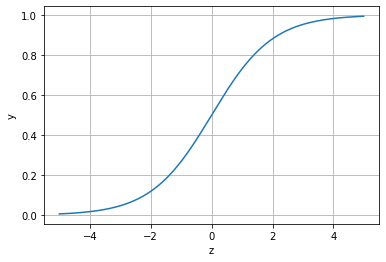

In [33]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(-5,5,0.01)
y = 1/(1+np.exp(-x))

plt.plot(x,y)
plt.xlabel('z')
plt.ylabel('y')
plt.grid()
plt.show()

通过上图我们可以发现 Logistic 函数是单调递增函数，并且在z=0的时候取值为0.5，并且$logi(\cdot)$函数的取值范围为$(0,1)$。

而回归的基本方程为$z=w_0+\sum_i^N w_ix_i$，

将回归方程写入其中为：
$$
p = p(y=1|x,\theta) = h_\theta(x,\theta)=\frac{1}{1+e^{-(w_0+\sum_i^N w_ix_i)}}
$$

所以, $p(y=1|x,\theta) = h_\theta(x,\theta)$，$p(y=0|x,\theta) = 1-h_\theta(x,\theta)$

逻辑回归从其原理上来说，逻辑回归其实是实现了一个决策边界：对于函数 $y=\frac{1}{1+e^{-z}}$,当 $z=>0$时,$y=>0.5$,分类为1，当 $z<0$时,$y<0.5$,分类为0，其对应的$y$值我们可以视为类别1的概率预测值.

对于模型的训练而言：实质上来说就是利用数据求解出对应的模型的特定的$w$。从而得到一个针对于当前数据的特征逻辑回归模型。

而对于多分类而言，将多个二分类的逻辑回归组合，即可实现多分类。

END